# Trabalho Interdisciplinar - 2s2021 - D2APR/D2TEC

## Especialização em Ciência de Dados - IFSP

Catia Tondolo ([@tondoloc](https://github.com/tondoloc)) - CP3013618

Prevendo o aparecimento de diabetes com base em medidas de diagnóstico.

### Contexto

Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. O objetivo do conjunto de dados é prever através de medidas de diagnóstico se um paciente tem diabetes ou não, com base em certas medidas incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de herança indígena Pima.

### Problemática

De acordo com a OMS, o diabetes é uma doença crônica que ocorre quando o pâncreas não produz insulina suficiente ou quando o corpo não consegue usar efetivamente a insulina que produz. A insulina é um hormônio que regula o açúcar no sangue. A hiperglicemia, ou aumento do açúcar no sangue, é um efeito comum do diabetes não controlado e, com o tempo, causa sérios danos a muitos sistemas do corpo, especialmente os nervos e os vasos sanguíneos.

### Objetivos

- experimentar diferentes métodos de classificação para ver qual produz a maior precisão
- classificar se alguém tem diabetes ou não devido a determinados recursos
- para determinar quais características são mais indicativas de diabetes 

### Dados

Os conjuntos de dados consistem em várias variáveis preditoras médicas e uma variável resultado. As variáveis preditoras incluem o número de gestações que a paciente teve, seu IMC, nível de insulina, idade e assim por diante. Os dados estão disponíves em:

[https://www.kaggle.com/uciml/pima-indians-diabetes-database/data]



### Importando bibliotecas

In [1]:
import numpy as np # algebra linear
import pandas as pd # processamento de dados
import seaborn as sns # visualização de dados
import matplotlib.pyplot as plt # gráficos
from collections import Counter
import os

# Modelagem
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split


/home/catia/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


### Carregar a base de dados

In [2]:
# Carregando o dataset
df = pd.read_csv("pima-data.csv")   

In [3]:
# Verificando a dimensão dos dados
df.shape

(768, 9)

In [249]:
# Principais informações do dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   diabetes      768 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 48.9 KB


### Variáveis

- num_preg: número de vezes que engravidou
- glucose_conc: concentração de glicose plasmática a 2 horas em um teste oral de tolerância à glicose
- diastolic_bp: pressão arterial diastólica (mm Hg)
- thickness: espessura da dobra cutânea do tríceps (mm)
- insulin: insulina sérica de 2 horas (mu U / ml)
- bmi: índice de massa corporal (IMC) (peso em kg/(altura em m)^2)
- diab_pred: pontua a probabilidade de diabetes com base na história familiar (predisposição)
- age: anos de idade
- diabetes: variável de classe (0 ou 1) 268 de 768 são 1, as outras são 0

In [23]:
# Verificando as primeiras linhas do dataset
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,627.0,50,True
1,1,85,66,29,0,26.6,351.0,31,False
2,8,183,64,0,0,23.3,672.0,32,True
3,1,89,66,23,94,28.1,167.0,21,False
4,0,137,40,35,168,43.1,2288.0,33,True


In [24]:
# Verificando as últimas linhas do dataset
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
763,10,101,76,48,180,32.9,171.00,63,False
764,2,122,70,27,0,36.8,0.34,27,False
765,5,121,72,23,112,26.2,245.00,30,False
766,1,126,60,0,0,30.1,349.00,47,True
767,1,93,70,31,0,30.4,315.00,23,False


In [25]:
# Verificando se existem valores nulos
df.isnull().values.any()

False

In [449]:
# principais resumos sobre o dataset
df.describe() 

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,428.235091,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,340.485655,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,205.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,337.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,591.500000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2329.000000,81.000000,1.000000


Observamos que o valor mínimo de algumas colunas é 0, o que não pode ser clinicamente possível. Portanto, no processo de limpeza de dados teremos que substituí-los por mediana / valor médio dependendo da distribuição.

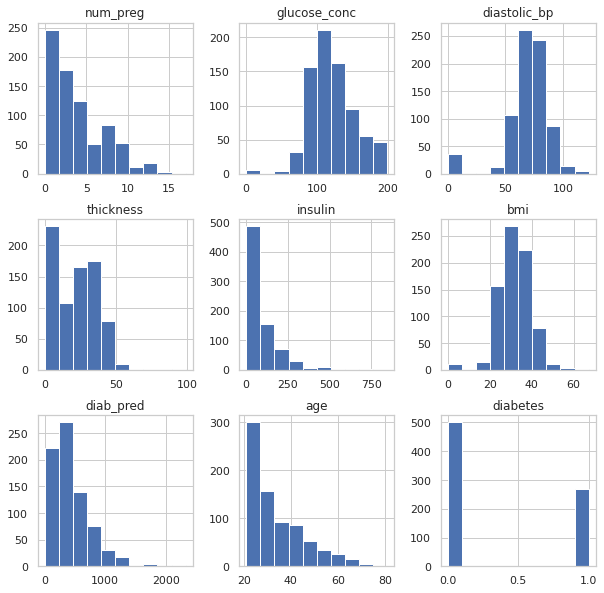

In [473]:
# histograma para cada variável onde podemos analisar a distribuição
df.hist(bins=10,figsize=(10,10))
plt.show()

Observamos que apenas a glicose e a pressão arterial são normalmente distribuídas, enquanto outras estão distorcidas e apresentam outliers .

<AxesSubplot:xlabel='diab_pred'>

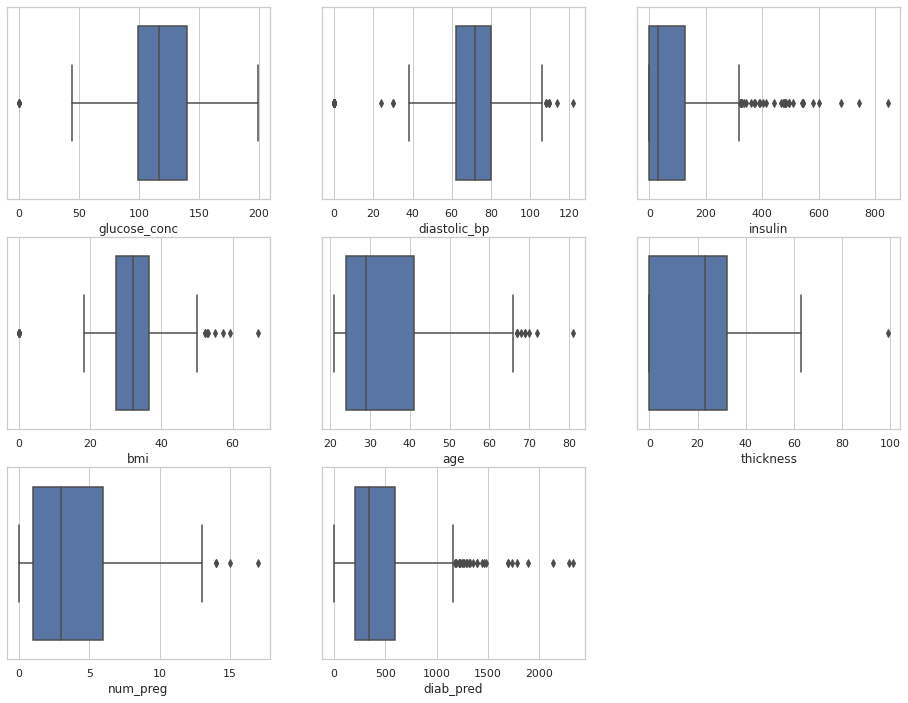

In [474]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='glucose_conc',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='diastolic_bp',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='bmi',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='thickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='num_preg',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='diab_pred',data=df)

Outliers são valores incomuns em seu conjunto de dados e podem distorcer as análises estatísticas e violar suas suposições. Portanto, é de extrema importância lidar com eles. Nesse caso, a remoção de outliers pode causar perda de dados, portanto, temos que lidar com isso usando várias técnicas de escala e transformação. 

### Primeira análise entre as variáveis

<AxesSubplot:>

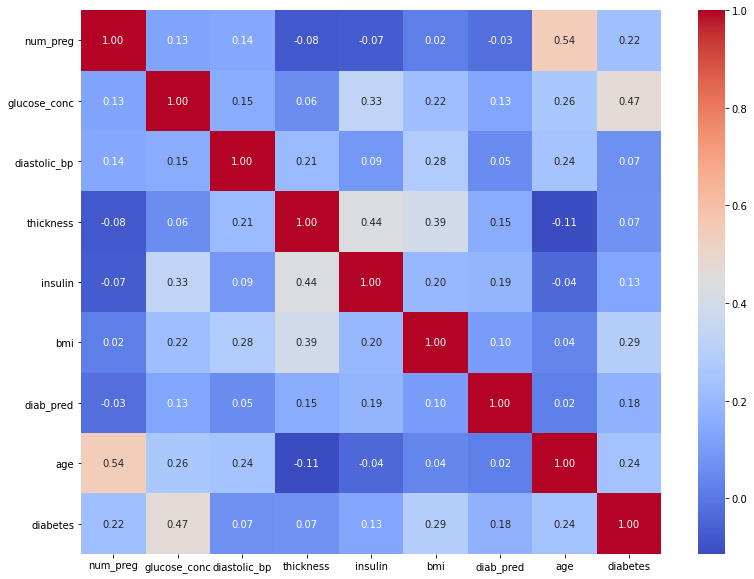

In [33]:
# Identificando a correlação entre as variáveis

plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm") 

Observe a última linha 'diabetes' e observe suas pontuações de correlação com as diferentes features. Podemos observar que a Glicose, o IMC e a Idade são os mais correlacionados com o Desfecho. Pressão sanguinea, Insulina, predisposição a diabetes são os menos correlacionados, portanto, eles não contribuem muito para o modelo, então podemos descartá-los. 

In [28]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.026205,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.133163,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.051436,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.154274,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185207,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.103575,0.036242,0.292695
diab_pred,-0.026205,0.133163,0.051436,0.154274,0.185207,0.103575,1.000000,0.017970,0.176608
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.017970,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.176608,0.238356,1.000000


De acordo com o o gráfico e a tabela podemos observar que características como gravidez, glicose, IMC e idade estão mais relacionadas com o resultado. 

### EDA

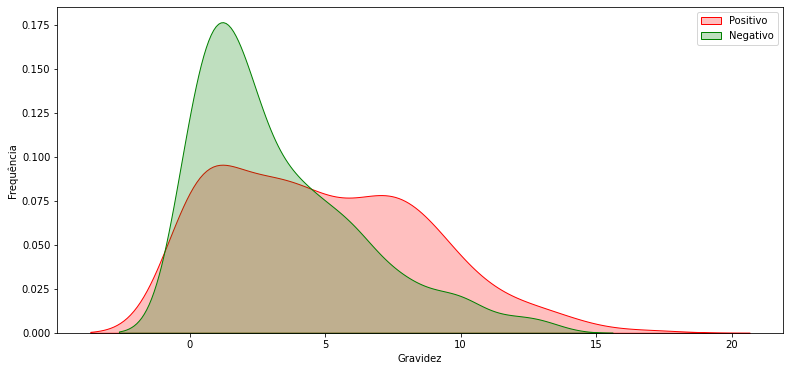

In [39]:
# Explorando a gravidez vs diabetes
plt.figure(figsize=(13,6))
g = sns.kdeplot(df["num_preg"][df["diabetes"] == 1], color="Red", shade = True)
g = sns.kdeplot(df["num_preg"][df["diabetes"] == 0], ax =g, color="Green", shade= True)
g.set_xlabel("Gravidez")
g.set_ylabel("Frequência")
g.legend(["Positivo","Negativo"])

<AxesSubplot:xlabel='diabetes', ylabel='glucose_conc'>

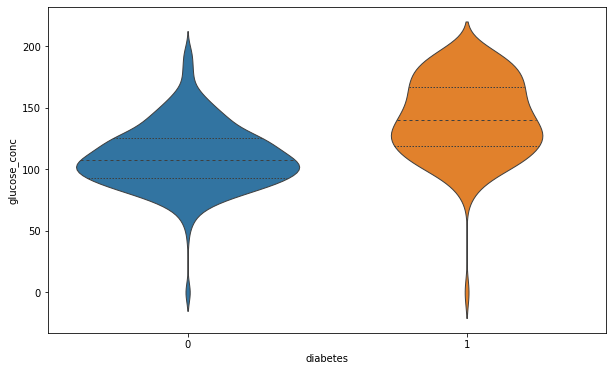

In [38]:
# glicose
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="diabetes", y="glucose_conc",
               split=True, inner="quart", linewidth=1)


Visualmente percebemos qiue as chances de ter diabetes aumentam gradualmente com o nível de concentração de glicose. 

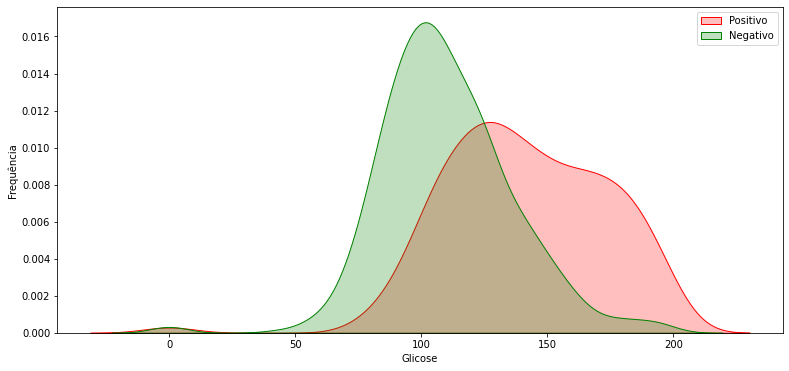

In [41]:
# Explorando a concentração de glicose vs diabetes

plt.figure(figsize=(13,6))
g = sns.kdeplot(df["glucose_conc"][df["diabetes"] == 1], color="Red", shade = True)
g = sns.kdeplot(df["glucose_conc"][df["diabetes"] == 0], ax =g, color="Green", shade= True)
g.set_xlabel("Glicose")
g.set_ylabel("Frequência")
g.legend(["Positivo","Negativo"])

Podemos perceber que a concentração de glicose é fator para a diabetes.

Explorando as variáveis mais correlacionadas

[Text(0.5, 0, 'Glicose'), Text(0, 0.5, 'BMI (IMC)')]

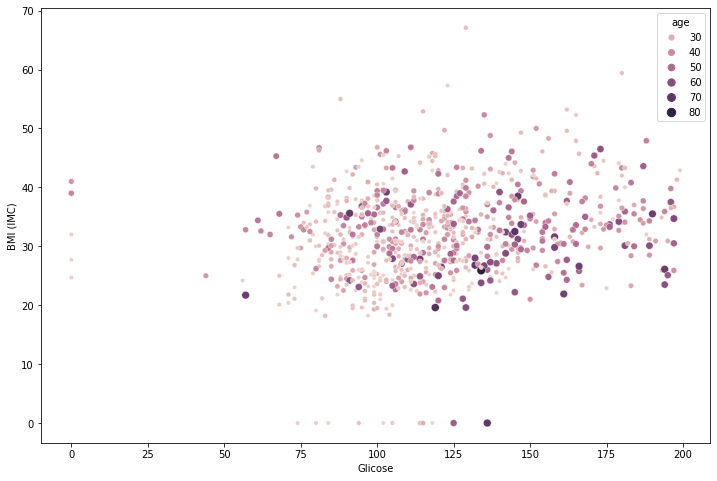

In [48]:
# Glicose vs BMI(IMC) vs idade

plt.figure(figsize=(12,8))
g = sns.scatterplot(data=df, x="glucose_conc", y="bmi", hue="age", size="age")
g.set(xlabel='Glicose', ylabel='BMI (IMC)')

De acordo com a observação do gráfico, existem alguns outliers que necessitarão atenção.

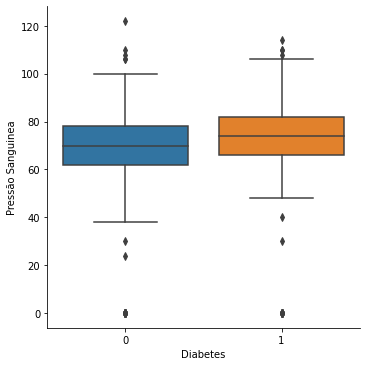

In [49]:
# Explorando a pressão sanguinea
g = sns.catplot(y="diastolic_bp",x="diabetes",data=df,kind="box")
g.set_ylabels("Pressão Sanguinea")
g.set_xlabels("Diabetes")

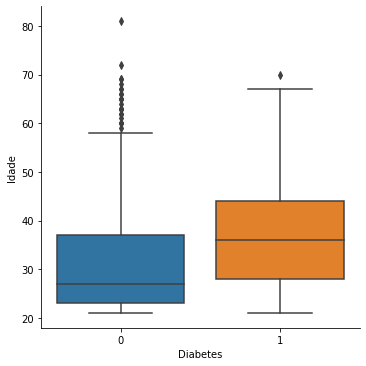

In [50]:
# Explorando a idade

g = sns.catplot(y="age",x="diabetes",data=df,kind="box")
g.set_ylabels("Idade")
g.set_xlabels("Diabetes")

<AxesSubplot:xlabel='diabetes', ylabel='diab_pred'>

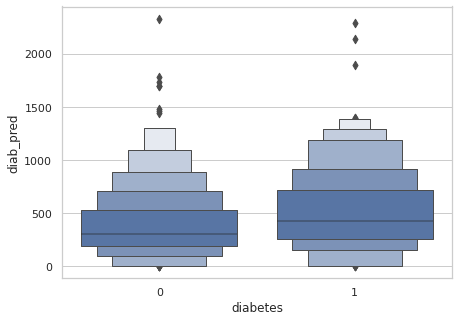

In [55]:
# Função de Linhagem de Diabetes

sns.set_theme(style="whitegrid")
plt.figure(figsize=(7,5))

sns.boxenplot(x="diabetes", y="diab_pred",
              color="b", 
              scale="linear", data=df)


Até agora, exploramos o conjunto de dados e visualizamos os dados. Em seguida, veremos um ouco de geature engeneering que é útil para melhorar o desempenho de algoritmos de aprendizado de máquina e costuma ser considerada como aprendizado de máquina aplicado. Selecionar os recursos importantes e reduzir o tamanho do conjunto de recursos torna a computação em aprendizado de máquina e algoritmos analíticos de dados mais viáveis. 

In [250]:
# Definindo as classes
diabetes_map = {True : 1, False : 0}

In [251]:
# Aplicando o mapeamento ao dataset
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [252]:
# Verificando as primeiras linhas do dataset
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,627.0,50,1
1,1,85,66,29,0,26.6,351.0,31,0
2,8,183,64,0,0,23.3,672.0,32,1
3,1,89,66,23,94,28.1,167.0,21,0
4,0,137,40,35,168,43.1,2288.0,33,1


In [253]:
# Verificando como os dados estão distribuídos
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de Casos Falsos     : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Número de Casos Verdadeiros: 268 (34.90%)
Número de Casos Falsos     : 500 (65.10%)


Transformador de quantis: 
- Este método transforma os recursos para seguir uma distribuição uniforme ou normal. Portanto, para um determinado recurso, essa transformação tende a espalhar os valores mais frequentes. Ele também reduz o impacto de outliers (marginais): este é, portanto, um esquema de pré-processamento robusto. 

In [4]:
from sklearn.preprocessing import QuantileTransformer
x = df
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age','diabetes']
df_new.head()

/home/catia/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
/home/catia/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  "X does not have valid feature names, but"


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,0.747718,0.810300,0.516949,0.801825,0.000000,0.591265,0.770535,0.889831,1.0
1,0.232725,0.097784,0.336375,0.644720,0.000000,0.227510,0.520209,0.558670,0.0
2,0.863755,0.956975,0.279009,0.000000,0.000000,0.091917,0.795306,0.585398,1.0
3,0.232725,0.131030,0.336375,0.505867,0.662973,0.298566,0.194915,0.000000,0.0
4,0.000000,0.721643,0.050847,0.801825,0.834420,0.926988,0.998696,0.606258,1.0


<AxesSubplot:xlabel='diab_pred'>

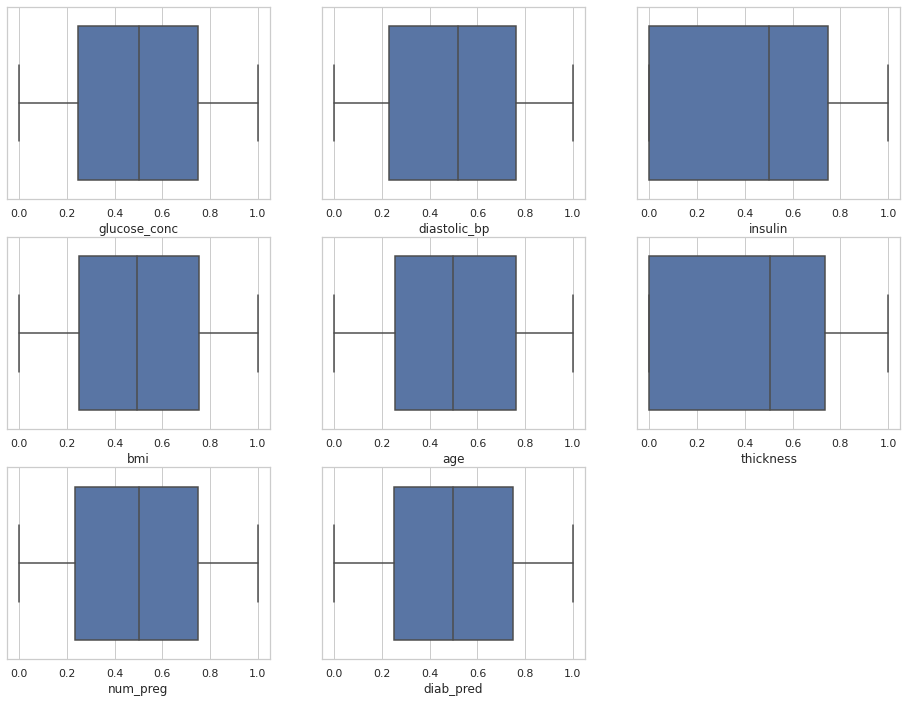

In [478]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='glucose_conc',data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x='diastolic_bp',data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x='insulin',data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x='bmi',data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x='age',data=df_new)
plt.subplot(3,3,6)
sns.boxplot(x='thickness',data=df_new)
plt.subplot(3,3,7)
sns.boxplot(x='num_preg',data=df_new)
plt.subplot(3,3,8)
sns.boxplot(x='diab_pred',data=df_new)

### Spliting

70% para dados de treino e 30% para dados de teste

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Seleção de variáveis preditoras (Feature Selection)
atributos = ['num_preg', 'glucose_conc', 'thickness', 'insulin', 'bmi', 'age']

In [7]:
# Variável a ser prevista
atrib_prev = ['diabetes']

In [8]:
# Criando objetos
X = df_new[atributos].values
Y = df_new[atrib_prev].values

In [9]:
X

array([[0.74771838, 0.81029987, 0.80182529, 0.        , 0.59126467,
        0.88983051],
       [0.2327249 , 0.09778357, 0.64471969, 0.        , 0.22750978,
        0.55867014],
       [0.86375489, 0.95697523, 0.        , 0.        , 0.09191656,
        0.58539765],
       ...,
       [0.6779661 , 0.54954368, 0.50586701, 0.71186441, 0.21316819,
        0.52933507],
       [0.2327249 , 0.61994785, 0.        , 0.        , 0.40026076,
        0.86701434],
       [0.2327249 , 0.17731421, 0.70273794, 0.        , 0.41329857,
        0.20013038]])

In [11]:
# Definindo a taxa de split
split_test_size = 0.30

In [489]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [490]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

69.92% nos dados de treino
30.08% nos dados de teste


In [491]:
X_treino

array([[0.2327249 , 0.19947849, 0.4041721 , 0.56258149, 0.10886571,
        0.12842243],
       [0.6779661 , 0.3357236 , 0.64471969, 0.95958279, 0.76662321,
        0.45501956],
       [0.        , 0.70338983, 0.9315515 , 0.92698827, 0.91003911,
        0.25488918],
       ...,
       [0.94067797, 0.28422425, 0.84028683, 0.        , 0.96414602,
        0.7053455 ],
       [0.        , 0.7535854 , 0.        , 0.        , 0.91395046,
        0.49674055],
       [0.        , 0.60430248, 0.        , 0.        , 0.07040417,
        0.        ]])

### verificando o processo de split

In [492]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), 
                                               (len(df.loc[df['diabetes'] ==1])/len(df.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), 
                                               (len(df.loc[df['diabetes'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 188 (35.01%)
Training False : 349 (64.99%)

Test True : 80 (34.63%)
Test False : 151 (65.37%)


### Feature Engeneering

Pudemos ver acima na análise inicial das medidas resumos que algumas variável possuiam valores nulos.

In [493]:
# Verificando se existem valores nulos
df.isnull().values.any()

False

In [494]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,627.0,50,1
1,1,85,66,29,0,26.6,351.0,31,0
2,8,183,64,0,0,23.3,672.0,32,1
3,1,89,66,23,94,28.1,167.0,21,0
4,0,137,40,35,168,43.1,2288.0,33,1


In [495]:
print("# Linhas no dataframe {0}".format(len(df)))
print("# Linhas missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# Linhas missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# Linhas missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# Linhas missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# Linhas missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# Linhas missing age: {0}".format(len(df.loc[df['age'] == 0])))

# Linhas no dataframe 768
# Linhas missing glucose_conc: 5
# Linhas missing diastolic_bp: 35
# Linhas missing thickness: 227
# Linhas missing insulin: 374
# Linhas missing bmi: 11
# Linhas missing age: 0


### Tratando Dados Missing - Impute 



In [496]:
# Criando objeto
preenche_0 = SimpleImputer(missing_values = 0, strategy = "mean")

# Substituindo os valores iguais a zero, pela média dos dados
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

Aqui para esta análise foi feita apenas utilizando a média, mas algumas das colunas têm uma distribuição enviesada, de modo que a média é mais afetada por outliers do que a mediana. A glicose e a pressão sanguínea têm distribuições normais, portanto, substitur os valores 0 nessas colunas pelo valor médio é eficaz. Espessura da pele, insulina e IMC têm distribuições distorcidas, portanto, a mediana seria uma escolha melhor, pois é menos afetada por valores discrepantes. *Nota para melhoramentos*.

In [497]:
X_treino

array([[0.2327249 , 0.19947849, 0.4041721 , 0.56258149, 0.10886571,
        0.12842243],
       [0.6779661 , 0.3357236 , 0.64471969, 0.95958279, 0.76662321,
        0.45501956],
       [0.56165951, 0.70338983, 0.9315515 , 0.92698827, 0.91003911,
        0.25488918],
       ...,
       [0.94067797, 0.28422425, 0.84028683, 0.74484156, 0.96414602,
        0.7053455 ],
       [0.56165951, 0.7535854 , 0.63907905, 0.74484156, 0.91395046,
        0.49674055],
       [0.56165951, 0.60430248, 0.63907905, 0.74484156, 0.07040417,
        0.53858103]])

In [498]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [499]:
X_treino = sc.fit_transform(X_treino)

In [500]:
X_teste = sc.transform(X_teste)

### Construir e treinar os modelos

In [501]:
# Utilizando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [502]:
# Criando o modelo preditivo
modelo_v1 = GaussianNB()

In [503]:
# Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB()

### Verificando a exatidão no modelo nos dados de treino


In [504]:
from sklearn import metrics

In [505]:
nb_predict_train = modelo_v1.predict(X_treino)

In [506]:
print("Acurácia (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
print()

Acurácia (Accuracy): 0.7709



### Verificando a exatidão no modelo nos dados de teste

In [507]:
nb_predict_test = modelo_v1.predict(X_teste)

In [508]:
print("Acurácia (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))
print()

Acurácia (Accuracy): 0.7186



### Métricas


In [509]:
# Criando uma Confusion Matrix
conf_matrix = confusion_matrix(Y_teste, nb_predict_test)
conf_matrix

print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_test, labels = [1, 0]))

[[ 57  23]
 [ 42 109]]

Classification Report
              precision    recall  f1-score   support

           1       0.58      0.71      0.64        80
           0       0.83      0.72      0.77       151

    accuracy                           0.72       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.72      0.72       231



In [510]:
conf_matrix.ravel()

array([109,  42,  23,  57])

In [511]:
tn, fp, fn, tp = conf_matrix.ravel()

In [512]:
conf_matrix_df = pd.DataFrame({
    'Pred Label – Negative': [tn, fn],
    'Pred Label – Positive': [fp, tp]
}, index=['True Label – Negative', 'True Label – Positive'])

conf_matrix_df

,Pred Label – Negative,Pred Label – Positive
True Label – Negative,109,42
True Label – Positive,23,57


In [513]:
precision = tp / (tp + fp)
recall = tp / (fn + tp)

print(f'Precisão: {precision}, Recall: {recall}')

Precisão: 0.5757575757575758, Recall: 0.7125


In [514]:
sensitivity = tp / (fn + tp)
specificity = tn / (fn + tn)

print(f'Sensibilidade: {sensitivity}, Especificidade: {specificity}')

Sensibilidade: 0.7125, Especificidade: 0.8257575757575758


In [515]:
accuracy = (tp + tn) / (tn + fn + fp + tp)

print(f'Acurácia: {accuracy}')

Acurácia: 0.7186147186147186


In [516]:
f1 = 2 * ((precision * recall) / (precision + recall))

print(f'F1-score: {f1}')

F1-score: 0.6368715083798883


Podemos também analisar a curva ROC. A curva ROC, ao representar a sensibilidade e a especificidade para todos os possíveis valores para o ponto de corte, é uma das ferramentas mais utilizadas para avaliar e comparar diferentes tipos de metodologias de diagnóstico. Além disso, a área sob a curva ROC é uma medida objetiva do desempenho do teste associado.

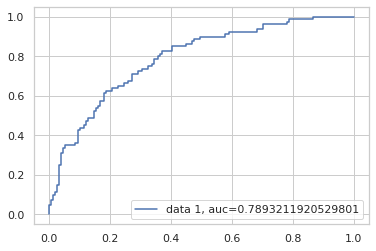

In [517]:
y_pred_proba = modelo_v1.predict_proba(X_teste)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_teste,  y_pred_proba)
auc = metrics.roc_auc_score(Y_teste, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [518]:
scores = pd.DataFrame({
    'Precisão': [precision],
    'Recall ': [recall],
    'Especificidade': [specificity],
    'Acurácia': [accuracy],
    'F1-score': [f1]
})
scores

,Precisão,Recall,Especificidade,Acurácia,F1-score
0,0.575758,0.7125,0.825758,0.718615,0.636872


### Otimizando o modelo com RandomForest


In [519]:
from sklearn.ensemble import RandomForestClassifier

In [520]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(random_state=42)

In [521]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(X_treino)
print("Acurácia (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

Acurácia (Accuracy): 1.0000


In [522]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(X_teste)
print("Acurácia (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))
print()

Acurácia (Accuracy): 0.7186



In [523]:
conf_matrix = confusion_matrix(Y_teste, rf_predict_test)
conf_matrix

print("{0}".format(metrics.confusion_matrix(Y_teste, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, rf_predict_test, labels = [1, 0]))

[[ 51  29]
 [ 36 115]]

Classification Report
              precision    recall  f1-score   support

           1       0.59      0.64      0.61        80
           0       0.80      0.76      0.78       151

    accuracy                           0.72       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.73      0.72      0.72       231



In [524]:
conf_matrix.ravel()

array([115,  36,  29,  51])

In [525]:
tn, fp, fn, tp = conf_matrix.ravel()

In [526]:
conf_matrix_df = pd.DataFrame({
    'Pred Label – Negative': [tn, fn],
    'Pred Label – Positive': [fp, tp]
}, index=['True Label – Negative', 'True Label – Positive'])

conf_matrix_df

,Pred Label – Negative,Pred Label – Positive
True Label – Negative,115,36
True Label – Positive,29,51


In [527]:
precision = tp / (tp + fp)
recall = tp / (fn + tp)

print(f'Precisão: {precision}, Recall: {recall}')

Precisão: 0.5862068965517241, Recall: 0.6375


In [528]:
sensitivity = tp / (fn + tp)
specificity = tn / (fn + tn)

print(f'Sensibilidade: {sensitivity}, Especificidade: {specificity}')

Sensibilidade: 0.6375, Especificidade: 0.7986111111111112


In [529]:
accuracy = (tp + tn) / (tn + fn + fp + tp)

print(f'Acurácia: {accuracy}')

Acurácia: 0.7186147186147186


In [530]:
f1 = 2 * ((precision * recall) / (precision + recall))

print(f'F1-score: {f1}')

F1-score: 0.6107784431137724


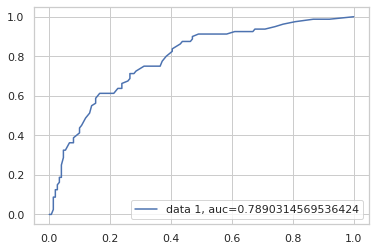

In [531]:
y_pred_proba = modelo_v2.predict_proba(X_teste)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_teste,  y_pred_proba)
auc = metrics.roc_auc_score(Y_teste, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [532]:
scores = pd.DataFrame({
    'Precisão': [precision],
    'Recall ': [recall],
    'Especificidade': [specificity],
    'Acurácia': [accuracy],
    'F1-score': [f1]
})
scores

,Precisão,Recall,Especificidade,Acurácia,F1-score
0,0.586207,0.6375,0.798611,0.718615,0.610778


### Regressão Logística

In [533]:
# Terceira versão do modelo usando Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)
modelo_v3.fit(X_treino, Y_treino.ravel())
lr_predict_test = modelo_v3.predict(X_teste)

In [534]:
print("Acurácia (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, lr_predict_test, labels = [1, 0]))

Acurácia (Accuracy): 0.7359

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.61      0.62        80
           0       0.80      0.80      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [535]:
conf_matrix = confusion_matrix(Y_teste, lr_predict_test)
conf_matrix

array([[121,  30],
       [ 31,  49]])

In [536]:
conf_matrix.ravel()

array([121,  30,  31,  49])

In [537]:
tn, fp, fn, tp = conf_matrix.ravel()

In [538]:
conf_matrix_df = pd.DataFrame({
    'Pred Label – Negative': [tn, fn],
    'Pred Label – Positive': [fp, tp]
}, index=['True Label – Negative', 'True Label – Positive'])

conf_matrix_df

,Pred Label – Negative,Pred Label – Positive
True Label – Negative,121,30
True Label – Positive,31,49


In [539]:
precision = tp / (tp + fp)
recall = tp / (fn + tp)

print(f'Precisão: {precision}, Recall: {recall}')

Precisão: 0.620253164556962, Recall: 0.6125


In [540]:
sensitivity = tp / (fn + tp)
specificity = tn / (fn + tn)

print(f'Sensibilidade: {sensitivity}, Especificidade: {specificity}')

Sensibilidade: 0.6125, Especificidade: 0.7960526315789473


In [541]:
accuracy = (tp + tn) / (tn + fn + fp + tp)

print(f'Acurácia: {accuracy}')

Acurácia: 0.7359307359307359


In [542]:
f1 = 2 * ((precision * recall) / (precision + recall))

print(f'F1-score: {f1}')

F1-score: 0.6163522012578617


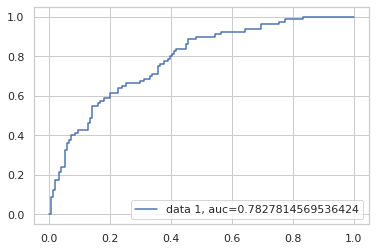

In [543]:
y_pred_proba = modelo_v3.predict_proba(X_teste)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_teste,  y_pred_proba)
auc = metrics.roc_auc_score(Y_teste, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [544]:
scores = pd.DataFrame({
    'Precisão': [precision],
    'Recall ': [recall],
    'Especificidade': [specificity],
    'Acurácia': [accuracy],
    'F1-score': [f1]
})
scores

,Precisão,Recall,Especificidade,Acurácia,F1-score
0,0.620253,0.6125,0.796053,0.735931,0.616352


### Avaliando diferentes modelos através da técnica de validação cruzada

In [545]:
def evaluate_model(models):
       
    # Modelo de validação cruzada 
    kfold = StratifiedKFold(n_splits = 10)
    
    result = []
    for model in models :
        result.append(cross_val_score(estimator = model, X = X_treino, y = Y_treino, scoring = "accuracy", cv = kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Models":[
            "LogisticRegression",
            "DecisionTreeClassifier",
            "AdaBoostClassifier",
            "SVC",
            "RandomForestClassifier",
            "GradientBoostingClassifier",
            "KNeighborsClassifier"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "CrossValMeans", y = "Models", data = result_df, orient = "h")
    bar.set_xlabel("Acurácia Média")
    bar.set_title("Escores da Validação Cruzada")
    return result_df

,CrossValMeans,CrossValerrors,Models
0,0.781971,0.053886,LogisticRegression
1,0.737456,0.040084,DecisionTreeClassifier
2,0.713242,0.054924,AdaBoostClassifier
3,0.780294,0.057206,SVC
4,0.761600,0.059748,RandomForestClassifier
5,0.772711,0.052748,GradientBoostingClassifier
6,0.715199,0.063930,KNeighborsClassifier


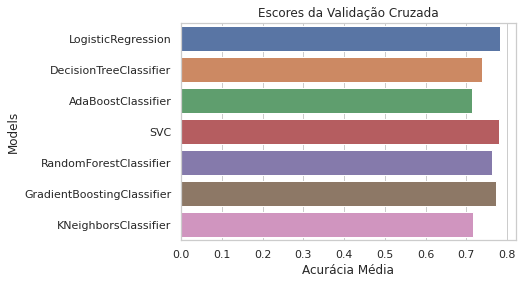

In [546]:
random_state = 30
models = [
    LogisticRegression(random_state = random_state, solver='liblinear'),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state), random_state = random_state, learning_rate = 0.2),
    SVC(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    KNeighborsClassifier(),
]

teste = evaluate_model(models)
evaluate_model(models)


De acordo com a modelagem acima, podemos observar que o modelo SVC, RandomForestClassifier, GradientBoostingClassifier e LogisticRegression tem mais precisão. Dados os resultados da validação cruzada dentre estes possíveis modelos utilizaria o modelo de regressão de logística para predizer os casos de diabetes desta pupulção feminina índia em questão.